<a href="https://colab.research.google.com/github/LiraNunezDavid/Equa-o-de-Lewis-AGMA-Mott-/blob/main/Equa%C3%A7%C3%A3o_de_Lewis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

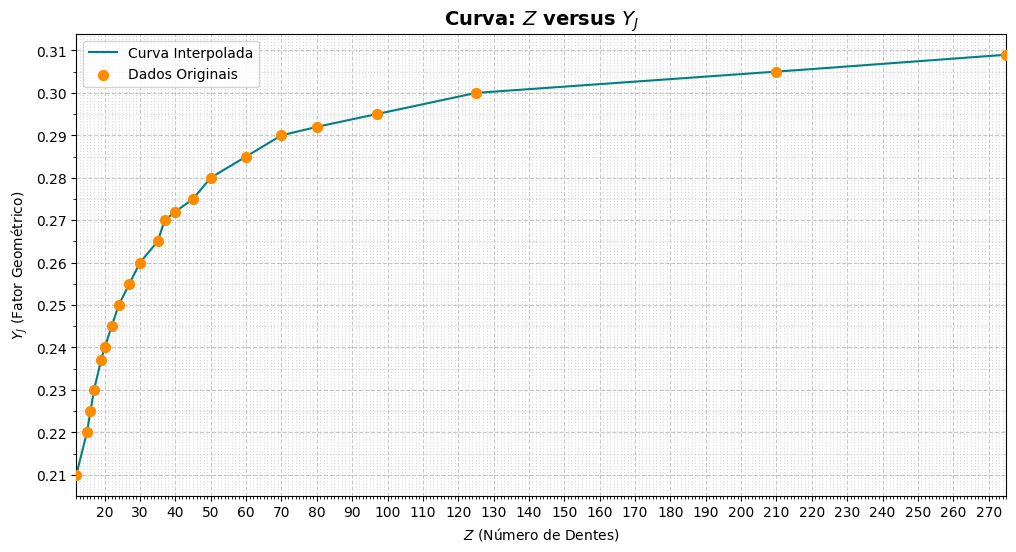

In [ ]:
# @title
# @Gráfico da Curva do Fator Geométrico
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator, AutoMinorLocator # Importar para controle de ticks

# 1. Dados da Tabela
tabela_z_yj = {
    12: 0.210, 15: 0.220, 16: 0.225, 17: 0.230, 19: 0.237, 20: 0.240,
    22: 0.245, 24: 0.250, 27: 0.255, 30: 0.260, 35: 0.265, 37: 0.270,
    40: 0.272, 45: 0.275, 50: 0.280, 60: 0.285, 70: 0.290, 80: 0.292,
    97: 0.295, 125: 0.300, 210: 0.305, 275: 0.309
}

# 2. Preparação dos dados
z_values_original = sorted(tabela_z_yj.keys())  # Coloca os números em ordem crescente.
yj_values_original = [tabela_z_yj[z] for z in z_values_original]

# Gerar uma gama mais densa de valores Z para a curva interpolada
z_for_interpolation = np.linspace(min(z_values_original), max(z_values_original), 500) # 500 pontos para uma curva suave
yj_interpolated = np.interp(z_for_interpolation, z_values_original, yj_values_original)

# 3. Criando a figura e o gráfico
fig, ax = plt.subplots(figsize=(12, 6)) # Define o tamanho da imagem e cria um objeto 'ax'

# Plota a curva interpolada como uma linha suave
ax.plot(z_for_interpolation, yj_interpolated, linestyle='-', color='teal', label='Curva Interpolada')

# Plota os pontos de dados originais sobre a curva
ax.scatter(z_values_original, yj_values_original, marker='o', color='darkorange', s=50, zorder=5, label='Dados Originais')

# 4. Customização Técnica
ax.set_title('Curva: $Z$ versus $Y_J$', fontsize=14, fontweight='bold')
ax.set_xlabel('$Z$ (Número de Dentes)', fontsize=10)
ax.set_ylabel('$Y_J$ (Fator Geométrico)', fontsize=10)

# Defina os limites do eixo x para começarem exatamente no valor Z mínimo.
ax.set_xlim(min(z_values_original), max(z_values_original))

# Ajuste as marcas de escala principais e secundárias no eixo x.
ax.xaxis.set_major_locator(MultipleLocator(10)) # Mgrandes variações a cada 10 unidades
ax.xaxis.set_minor_locator(MultipleLocator(1))  # Pequenos tiques a cada unidade

# Ajuste as marcas de escala principais e secundárias no eixo y.
ax.yaxis.set_major_locator(MultipleLocator(0.01)) # Marcas principais a cada 0.01 unidades
ax.yaxis.set_minor_locator(MultipleLocator(0.005)) # Marcas secundárias a cada 0.005 unidades

# Adicione uma grade para facilitar a leitura, mostrando as grades principais e secundárias.
ax.grid(True, which='major', linestyle='--', alpha=0.7)
ax.grid(True, which='minor', linestyle=':', alpha=0.5) # Grade pontilhada para marcas menores

# Adiciona uma legenda
ax.legend()

# 5. Mostra o gráfico final
plt.show()

In [3]:
# @title
# @ Encontrar o Fator Geométrico
import numpy as np

tabela_z_yj = {
    12: 0.210,
    15: 0.220,
    16: 0.225,
    17: 0.230,
    19: 0.237,
    20: 0.240,
    22: 0.245,
    24: 0.250,
    27: 0.255,
    30: 0.260,
    35: 0.265,
    37: 0.270,
    40: 0.272,
    45: 0.275,
    50: 0.280,
    60: 0.285,
    70: 0.290,
    80: 0.292,
    97: 0.295,
    125: 0.300,
    210: 0.305,
    275: 0.309
}

# Preparar os dados para interpolação: obter as chaves ordenadas e os valores correspondentes.
z_values = sorted(tabela_z_yj.keys())           # soted: coloca os números em ordem crescente
yj_values = [tabela_z_yj[z] for z in z_values]

def get_yj_value(z_procurado):
    if z_procurado in tabela_z_yj:
        return tabela_z_yj[z_procurado], True # Return value and a flag for exact match
    else:
        if z_procurado < z_values[0] or z_procurado > z_values[-1]:
            return None, False # Indicate out of range
        else:
            resultado_yj_interpolado = np.interp(z_procurado, z_values, yj_values)
            return resultado_yj_interpolado, False # Return interpolated value and flag


# Original interactive loop (can be kept or removed if only programmatic access is desired)
while True:
    print("^" * 95)
    entrada_str = input("Digite o número de dentes (Z) da engrenagem que deseja procurar (ou 'sair' para encerrar): ")
    if entrada_str.lower() == 'sair':
        print("Encerrando o programa.")
        print("=" * 95)
        break
    try:
        z_procurado = int(entrada_str)
        print("x" * 95)
        yj_result, is_exact = get_yj_value(z_procurado)
        if yj_result is not None:
            if is_exact:
                print(f"✅ Para Z = {z_procurado}, o Fator Geométrico (Y_J) exato é: {yj_result:.3f}")
            else:
                print(f"🔶 Para Z = {z_procurado}, o Fator Geométrico (Y_J) interpolado é: {yj_result:.3f}")
        else:
            print(f"⚠️ O valor Z = {z_procurado} está fora do intervalo da tabela para interpolação.")
        print("x" * 95)

    except ValueError:
        print("⚠️ Erro: Por favor, digite apenas números inteiros válidos para Z.")

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Digite o número de dentes (Z) da engrenagem que deseja procurar (ou 'sair' para encerrar): sair
Encerrando o programa.


In [ ]:
# @title
# @ Cálculo da Tensçao de Flexão (Equação de Lewis) { display-mode: "form" }

def calcular_sigma_estilizado():
    # Definindo os símbolos Unicode
    sigma = "\u03c3"
    ft = "F\u209C"
    mn = "m\u2094"
    yj_symbol = "Y\u208A" # Usando o subscrito J (U+208A) se disponível ou aproximado

    print("=" * 85)
    print(f"Cálculo da Tensão de flexão ({sigma}), usando a equação de Lewwis, segundo Robert Mott")
    print("=" * 85)
    try:
        # Primeiro: encontrar o Y_J ingressando Z, e usando a função já definida.
        z_dentes = int(input("Digite o número de dentes (Z) da engrenagem: "))
        # Certifique-se de que get_yj_value esteja definido no contexto de execução (execute a célula que o contém primeiro).
        yj_value, is_exact = get_yj_value(z_dentes)

        if yj_value is None:
            print(f"⚠️ Não foi possível obter o Fator Geométrico (Y_J) para Z = {z_dentes}. Fora do intervalo da tabela.")
            return # Saia da função se Y_J não puder ser encontrado.
        else:
            if is_exact:
                print(f"✅ Fator Geométrico (Y_J) exato para Z = {z_dentes} é: {yj_value:.3f}")
            else:
                print(f"🔶 Fator Geométrico (Y_J) interpolado para Z = {z_dentes} é: {yj_value:.3f}")

        print("-" * 85)
        val_ft = float(input(f"Digite o valor da Força Tangencial {ft} em (N): "))
        print("-" * 85)
        val_b  = float(input("Digite o valor da largura da face b em (mm): "))
        print("-" * 85)
        val_mn = float(input(f"Digite o valor do módulo normal {mn} em (mm): "))
        # Y_J agora é `yj_value` obtido da função de pesquisa

        # Equação de Lewis para tensão de flexão: sigma = Ft / (b * mn * Yj)
        res_sigma = val_ft / (val_b * val_mn * yj_value) # Use yj_value here

        print("=" * 85)
        # Exibindo a fórmula com os símbolos corretos
        print(f"A tensão de flexão no cordão raiz do dente é: {sigma} = {res_sigma:.2f} MPa")
        print("="*85)

    except ValueError:
        print("⚠️ Erro: Por favor, digite apenas números válidos.")
    except NameError:
        print("⚠️ Erro: A função 'get_yj_value' não foi encontrada. Certifique-se de executar o código do Fator Geométrico (Y_J) primeiro.")

calcular_sigma_estilizado()

Cálculo da Tensão de flexão (σ), usando a equação de Lewwis, segundo Robert Mott
Digite o número de dentes (Z) da engrenagem: 20
✅ Fator Geométrico (Y_J) exato para Z = 20 é: 0.240
-------------------------------------------------------------------------------------
Digite o valor da Força Tangencial Fₜ em (N): 1200
-------------------------------------------------------------------------------------
Digite o valor da largura da face b em (mm): 25
-------------------------------------------------------------------------------------
Digite o valor do módulo normal mₔ em (mm): 4
A tensão de flexão no cordão raiz do dente é: σ = 50.00 MPa


In [4]:
#@title ⚙️ Calculadora de Tensão de Flexão (Equação de Lewis) { display-mode: "form" }

# --- PARÂMETROS DE ENTRADA ---

#@markdown ### Insira os dados da engrenagem:

z_dentes = 15 #@param {type:"integer", label:"Número de dentes (Z):"}
val_ft = 3490 #@param {type:"number", label:"Força Tangencial Ft (N):"}
val_b = 28 #@param {type:"number", label:"Largura da face b (mm):"}
val_mn = 4 #@param {type:"number", label:"Módulo normal mn (mm):"}

def calcular_sigma_automatico():
    # Símbolos Unicode
    sigma = "\u03c3"
    ft_sym = "F\u209C"
    mn_sym = "m\u2094"

    print("=" * 85)
    print(f"Calculadora de Tensão de flexão ({sigma}), segundo Robert Mott")
    print("=" * 85)

    try:
        # Busca o Y_J usando a função que você já tem definida
        yj_value, is_exact = get_yj_value(z_dentes)

        if yj_value is None:
            print(f"⚠️ Erro: Z = {z_dentes} está fora do intervalo da tabela.")
            return

        status = "exato" if is_exact else "interpolado"
        print(f"✅ Fator Geométrico (Y_J) {status} para Z = {z_dentes}: {yj_value:.3f}")
        print("-" * 85)

        # Cálculo da Equação de Lewis
        res_sigma = val_ft / (val_b * val_mn * yj_value)

        print(f"VALORES UTILIZADOS: {ft_sym}={val_ft}N, b={val_b}mm, {mn_sym}={val_mn}mm")
        print("-" * 85)
        print(f"RESULTADO: {sigma} = {res_sigma:.2f} MPa")
        print("=" * 85)

    except NameError:
        print("⚠️ Erro: Execute a célula que contém a função 'get_yj_value' primeiro.")
    except ZeroDivisionError:
        print("⚠️ Erro: Largura da face (b), módulo (mn) ou Y_J não podem ser zero.")

# Executa automaticamente com os valores do formulário
calcular_sigma_automatico()

Calculadora de Tensão de flexão (σ), segundo Robert Mott
✅ Fator Geométrico (Y_J) exato para Z = 15: 0.220
-------------------------------------------------------------------------------------
VALORES UTILIZADOS: Fₜ=3490N, b=28mm, mₔ=4mm
-------------------------------------------------------------------------------------
RESULTADO: σ = 141.64 MPa
